# Задание 1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tz_data.csv').drop('good (1)', axis=1).dropna()
df.head()

,area,cluster,cluster_name,keyword,count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,163,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1146,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,823,3.283940,4.39674063521296


In [3]:
df = df.drop_duplicates(subset=['area', 'keyword'])

In [4]:
colors = ['#17becf', '#bcbd22', '#7f7f7f', '#e377c2']

In [5]:
df.cluster = df.cluster.astype('int32')

In [6]:
df['color'] = df.apply(lambda row: colors[row.cluster], axis=1)

In [7]:
df[df['count'] == '-']

,area,cluster,cluster_name,keyword,count,x,y,color
217,greetings,1,Кластер 1,diversity unlike,-,9.195444,11.26136706467054,#bcbd22


In [8]:
df = df.drop(df[df['count'] == '-'].index)
df = df.drop(df[df['count'] == 'N\\A'].index)

In [9]:
df['count'] = df['count'].astype('int32')

In [10]:
df = df.drop(df[df.y == '0x414fe002'].index)
df['y'] = df['y'].astype('float64')

In [11]:
df = df[['area', 'cluster', 'cluster_name', 'keyword', 'x', 'y', 'count', 'color']]
df = df.sort_values(by=['area', 'cluster', 'cluster_name', 'count'], 
                    ascending=[True, True, True, False],
                   )
df.head(10)

,area,cluster,cluster_name,keyword,x,y,count,color
106,ar\vr,0,Кластер 0,written conflict fabulous,2.991167,7.106799,1443,#17becf
108,ar\vr,0,Кластер 0,reservations linking,10.195602,12.259496,751,#17becf
107,ar\vr,0,Кластер 0,interfaces neutral,10.443533,13.809915,586,#17becf
109,ar\vr,0,Кластер 0,committees parallel,6.735260,3.613983,173,#17becf
110,ar\vr,1,Кластер 1,postcards looked republic detector,10.474474,6.220012,1397,#bcbd22
112,ar\vr,1,Кластер 1,michael tobacco,6.210880,12.721264,1007,#bcbd22
111,ar\vr,1,Кластер 1,filling volunteers academics,10.833920,8.652737,773,#bcbd22
113,ar\vr,1,Кластер 1,celtic automation,12.197275,4.723751,715,#bcbd22
116,ar\vr,2,Кластер 2,enquiries implementation,3.580718,8.089951,1249,#7f7f7f
115,ar\vr,2,Кластер 2,previously standing languages commands,14.668089,8.467136,889,#7f7f7f


In [187]:
df = df.reset_index().drop('index', axis=1)

In [12]:
df.to_csv('Task1.csv', index=None)

# Задание 2

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [116]:
def wrapper(text):
    text_split = text.split()
    return ' '.join(text_split[0:2]) + '\n' + ' '.join(text_split[2:])

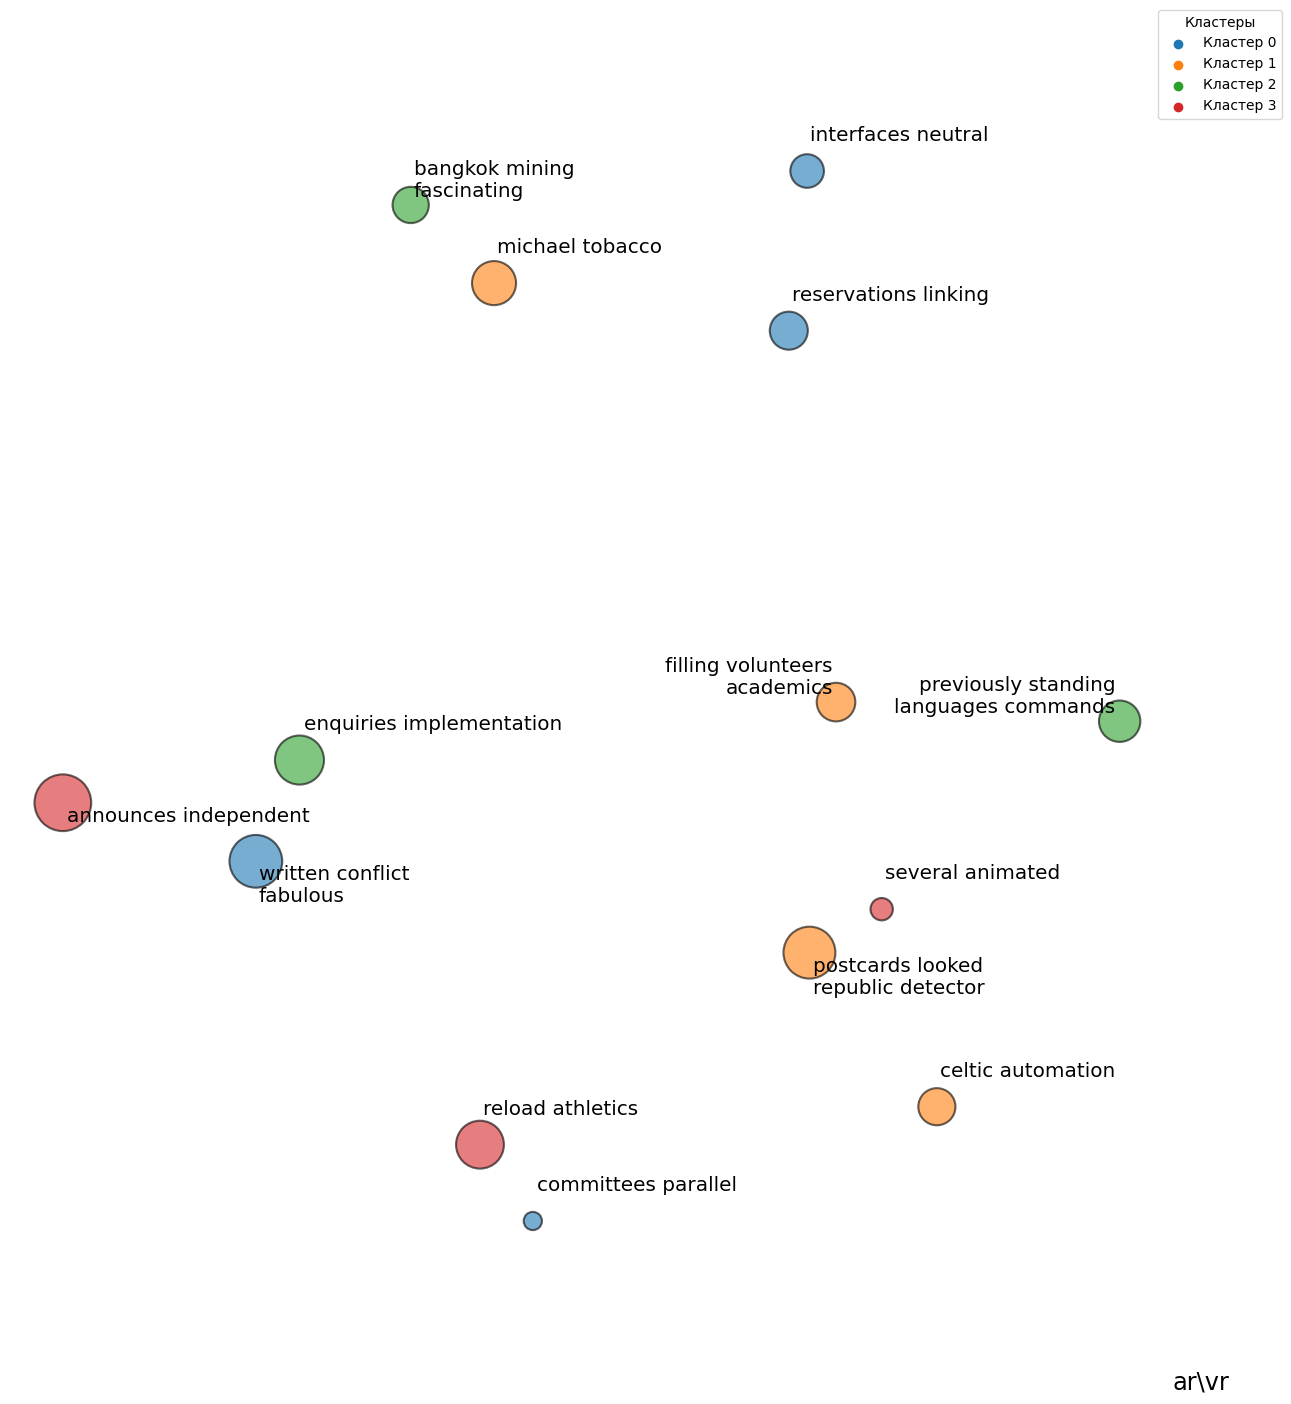

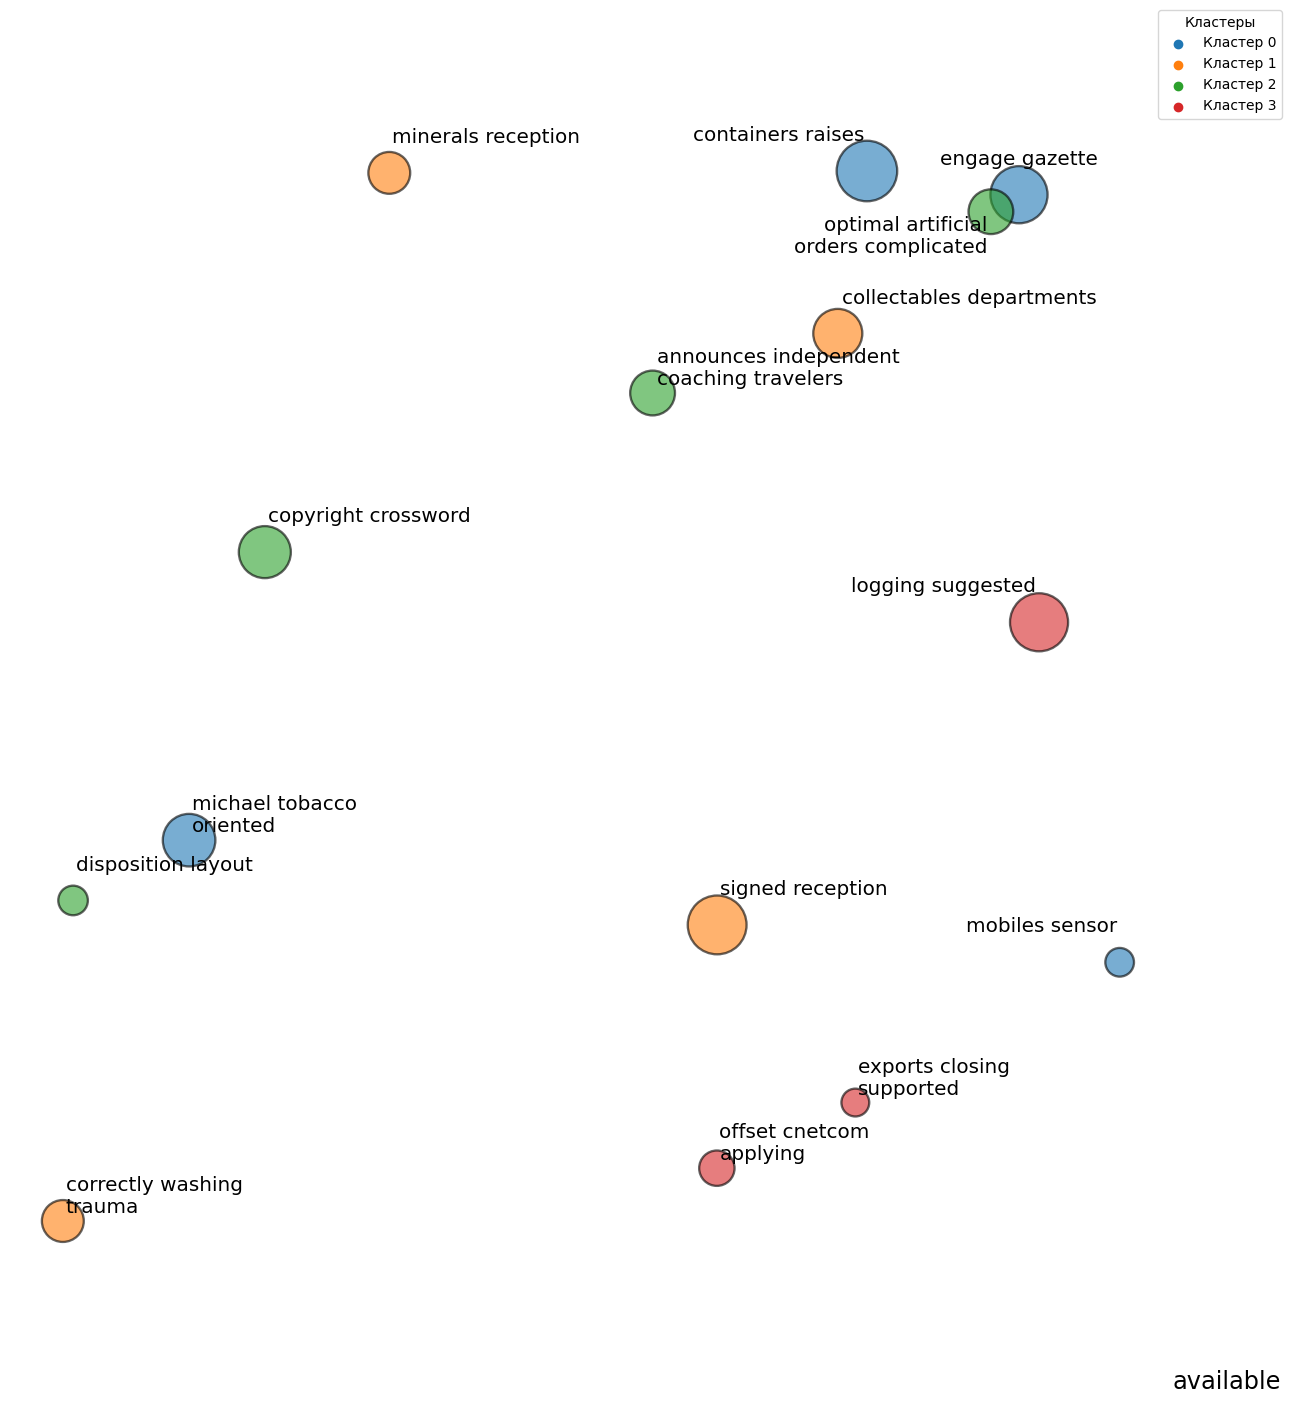

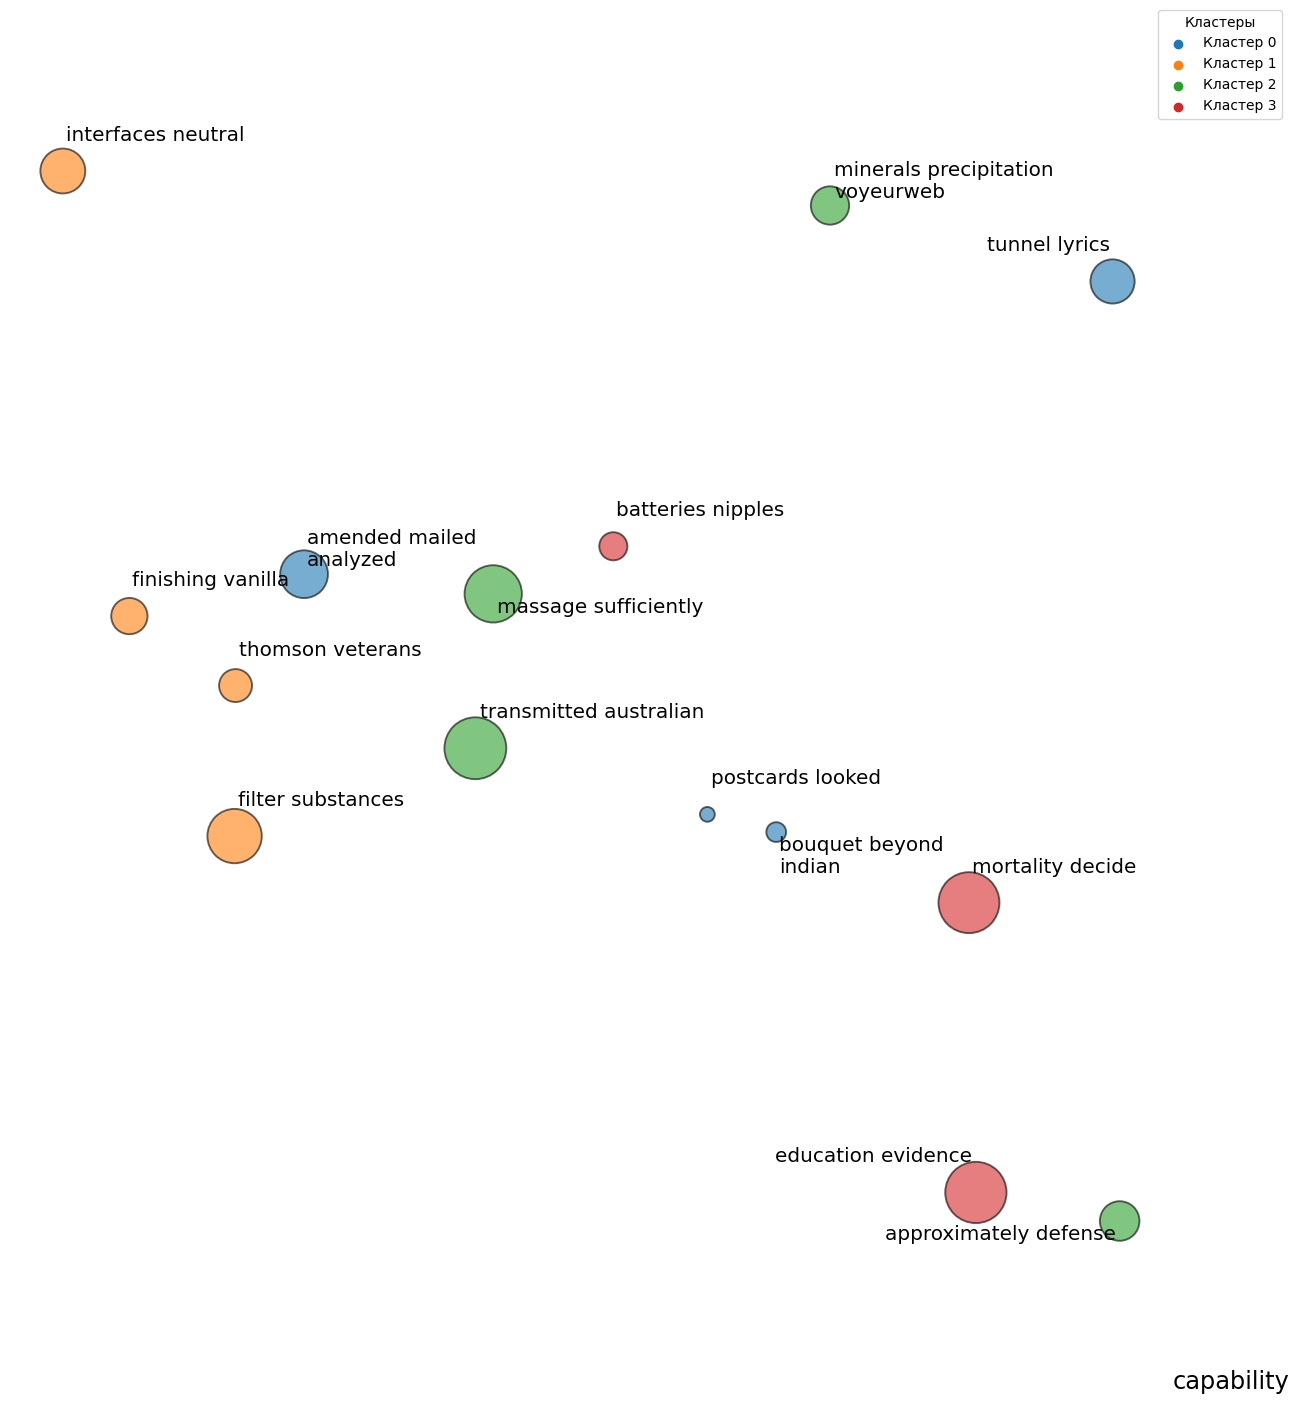

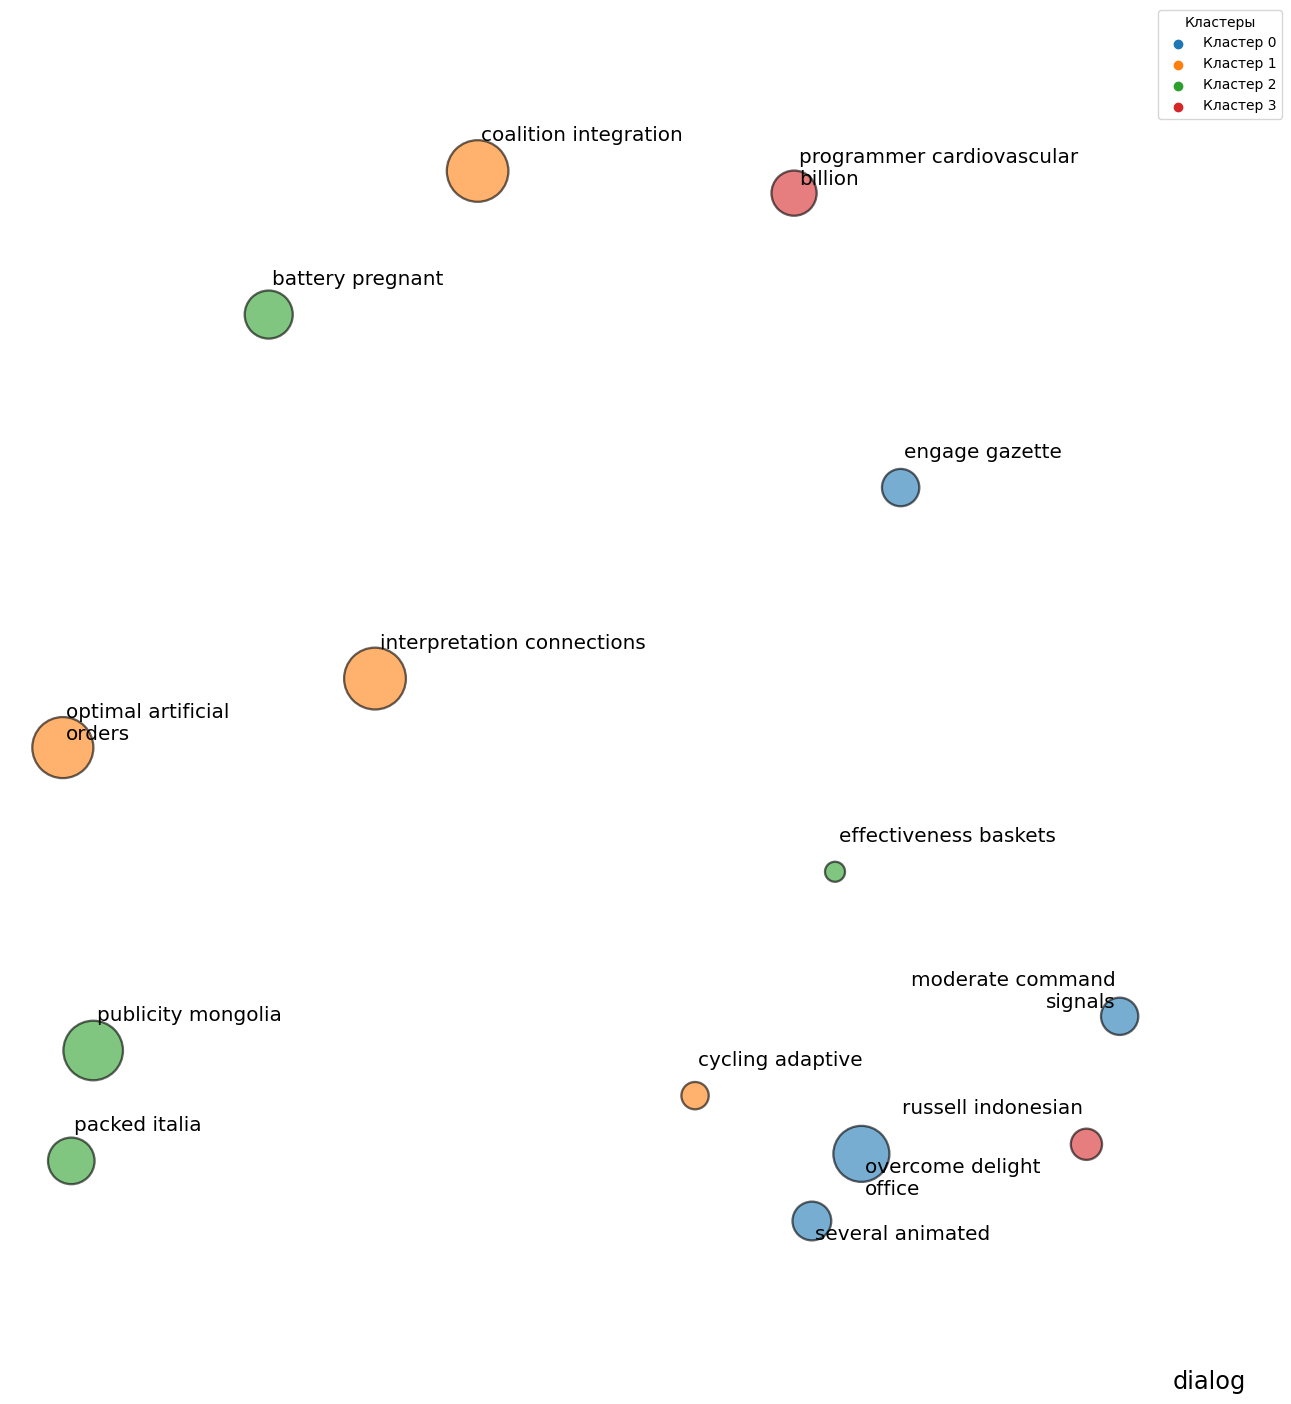

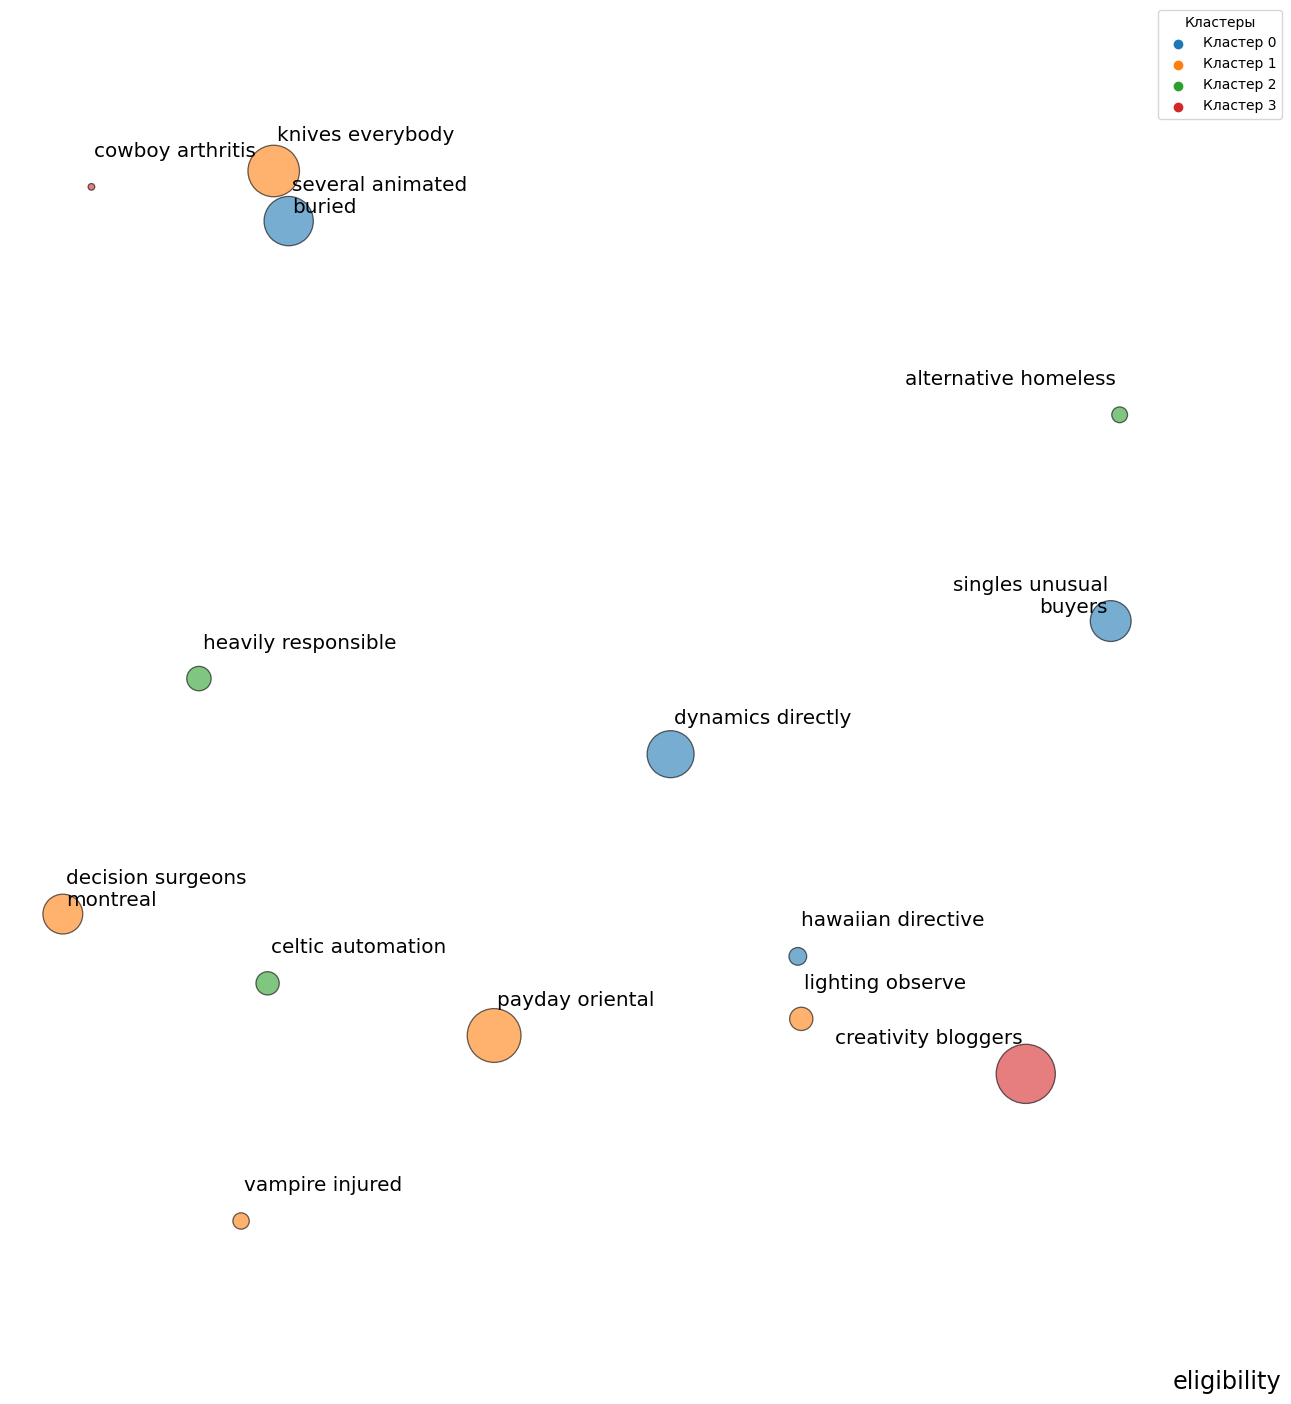

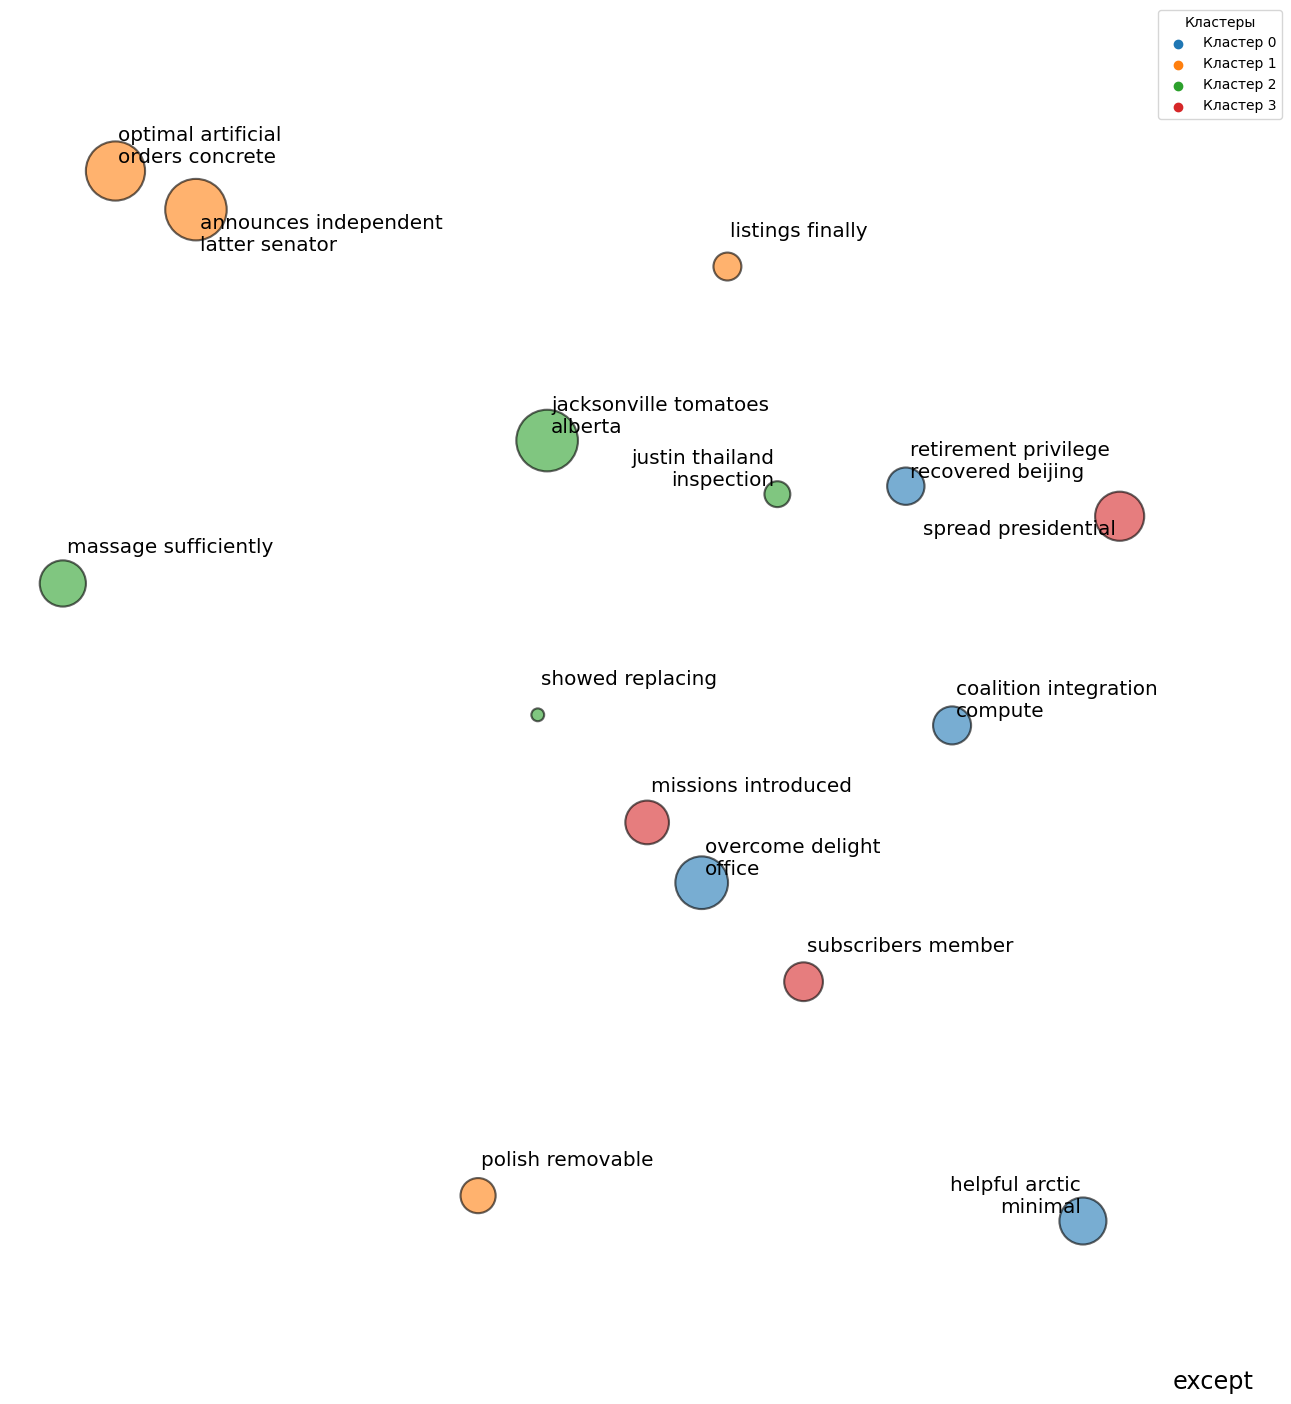

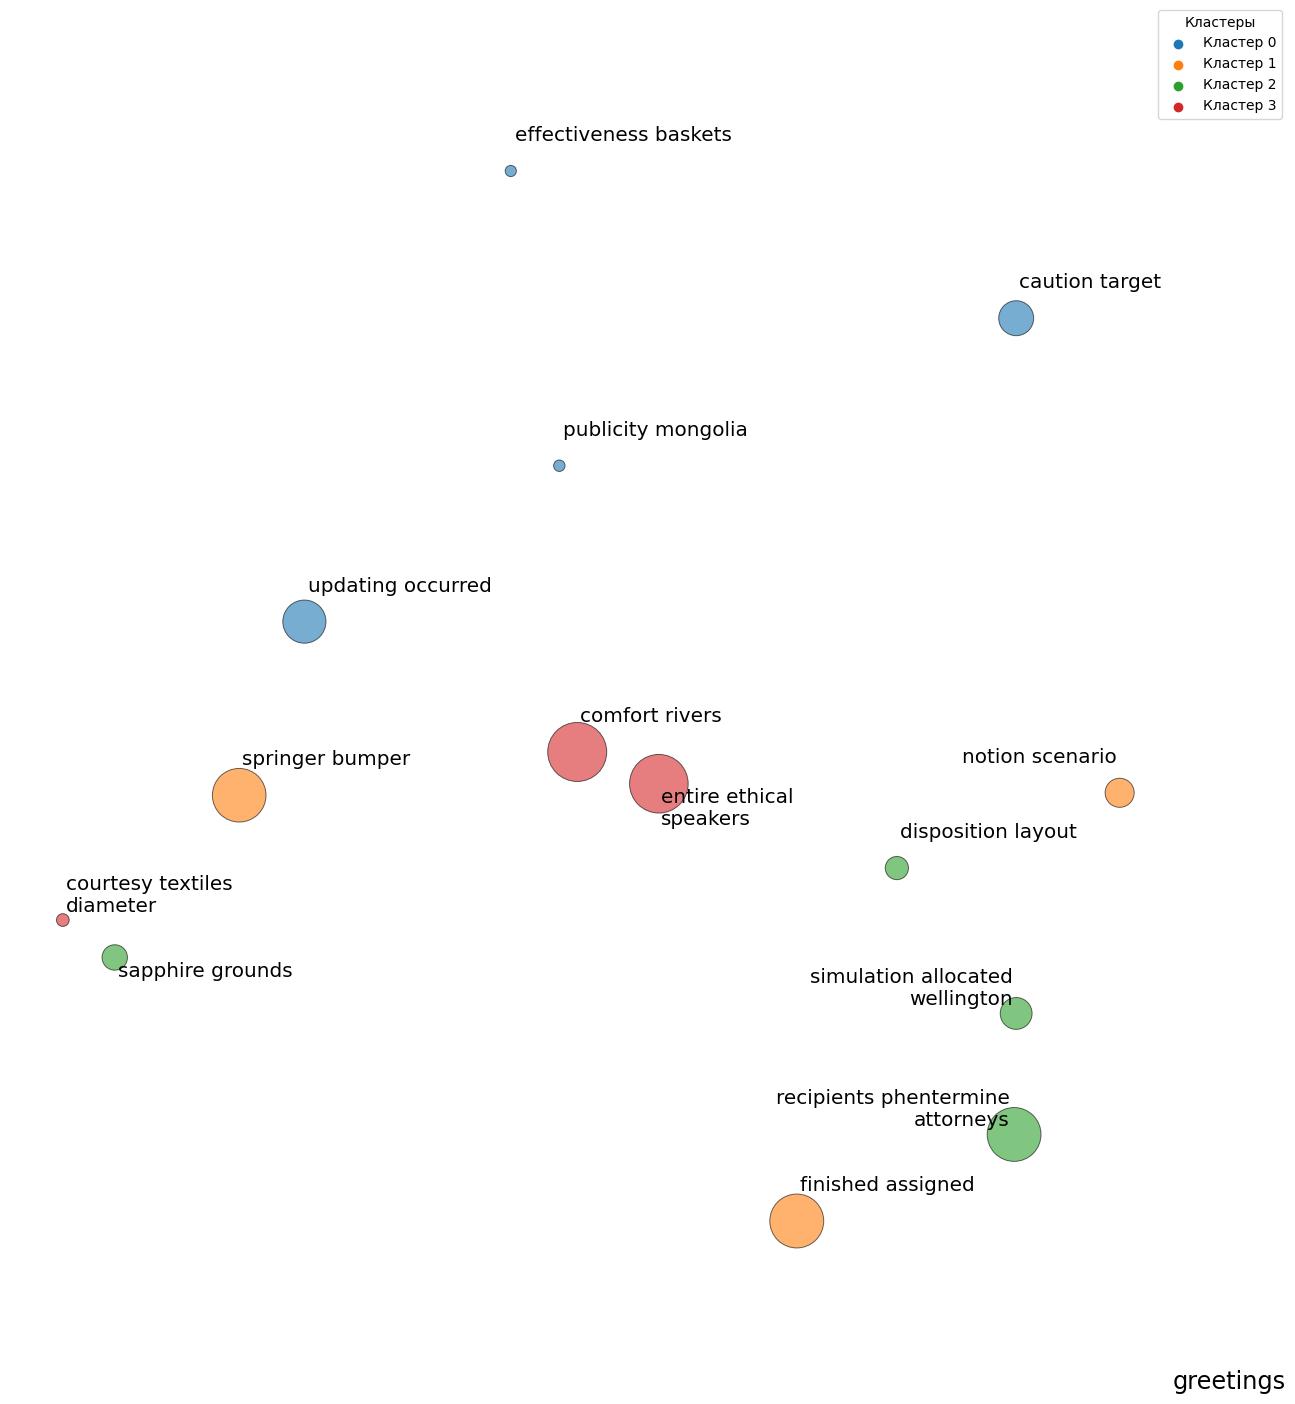

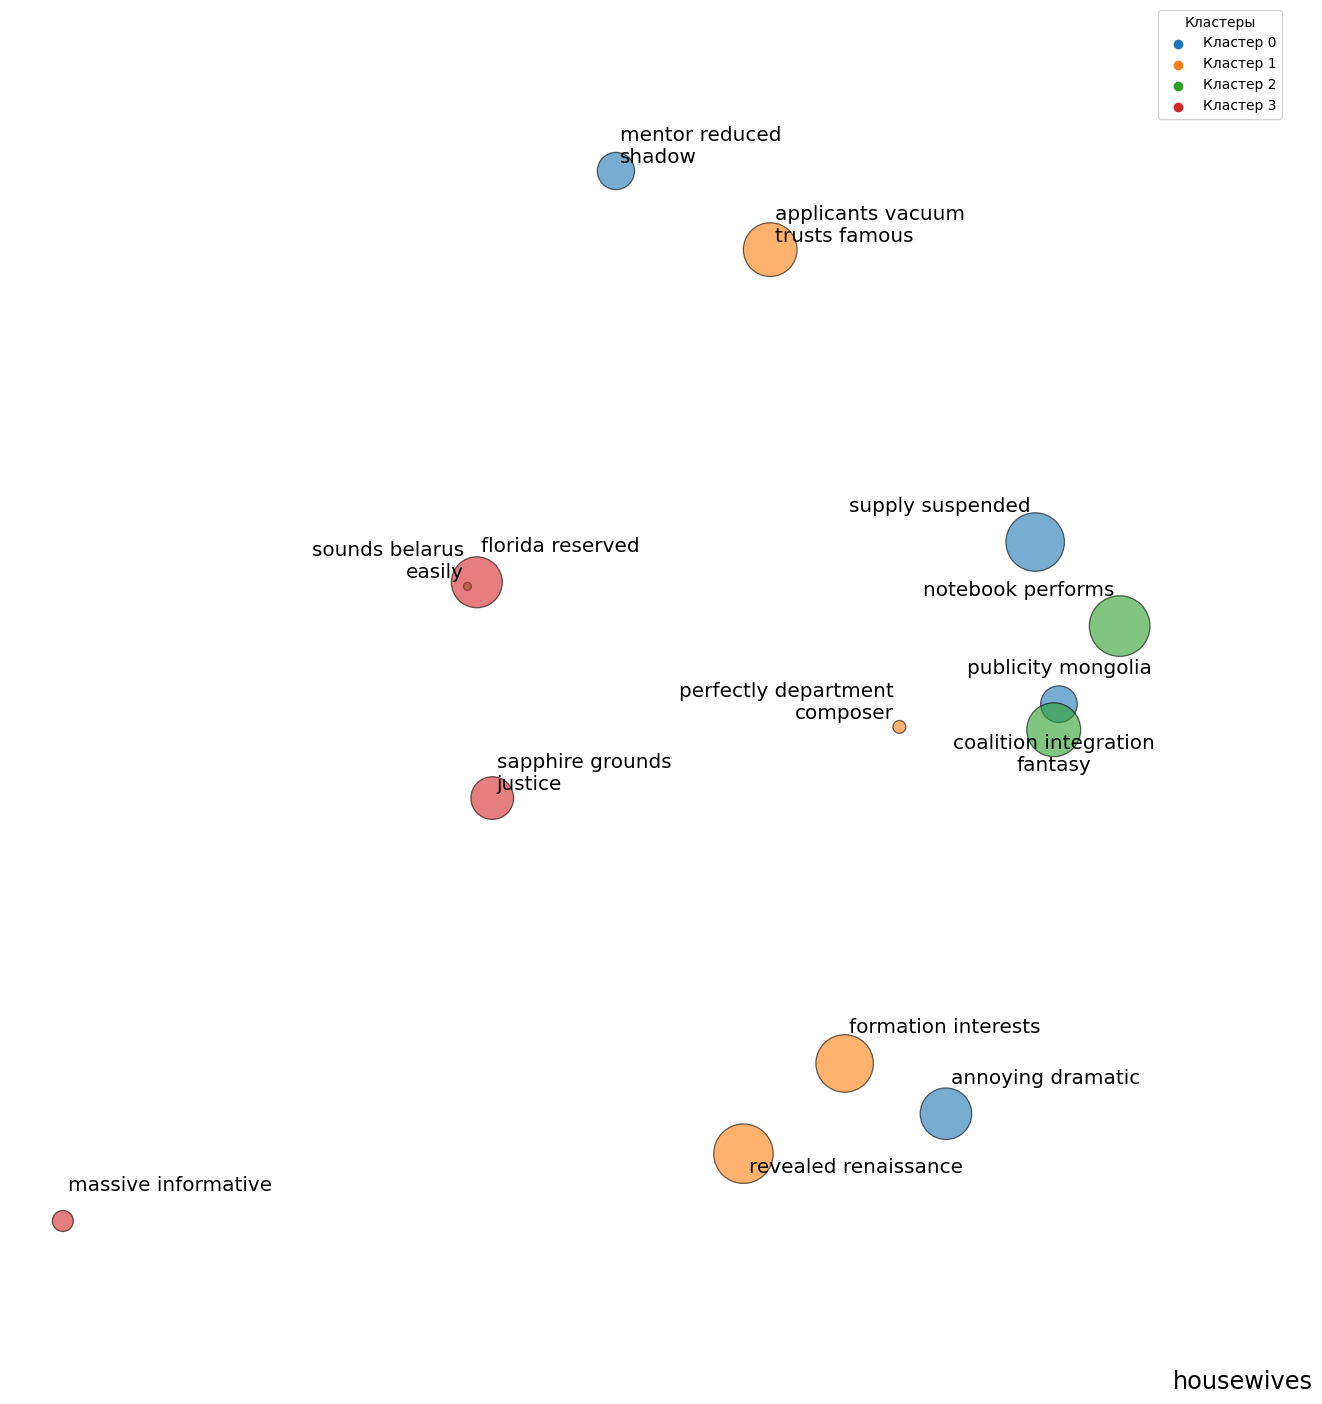

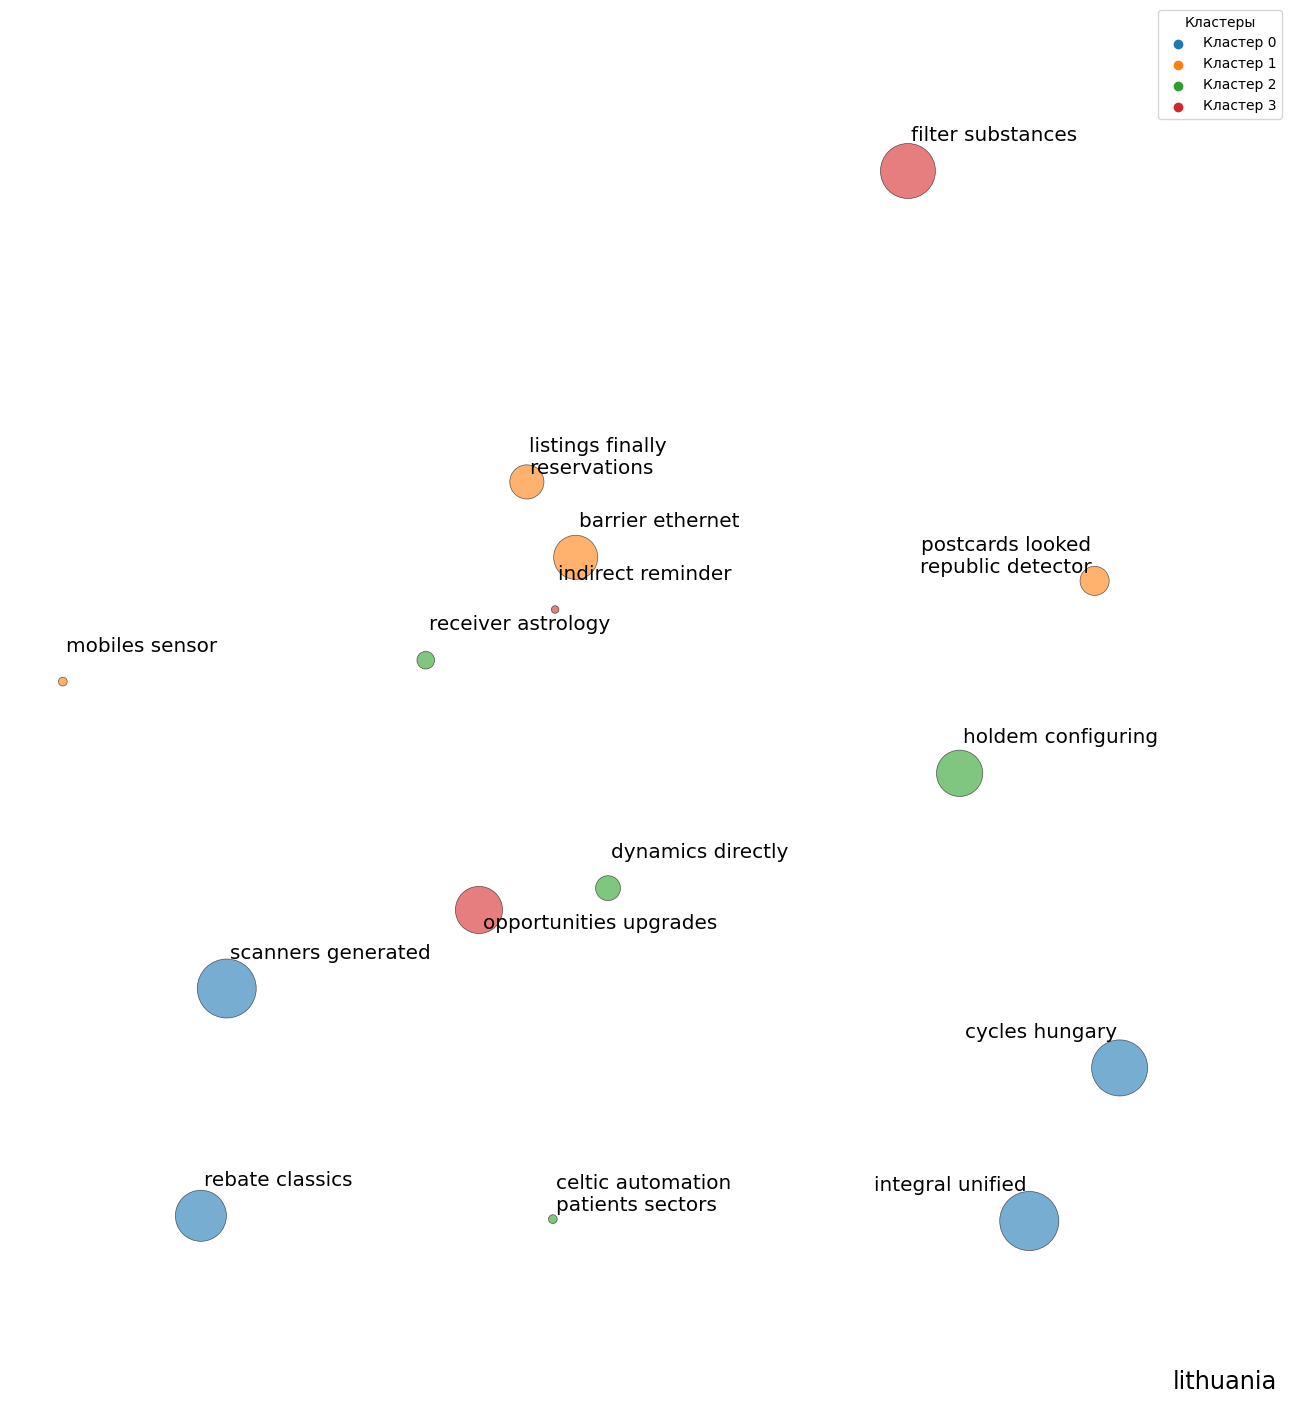

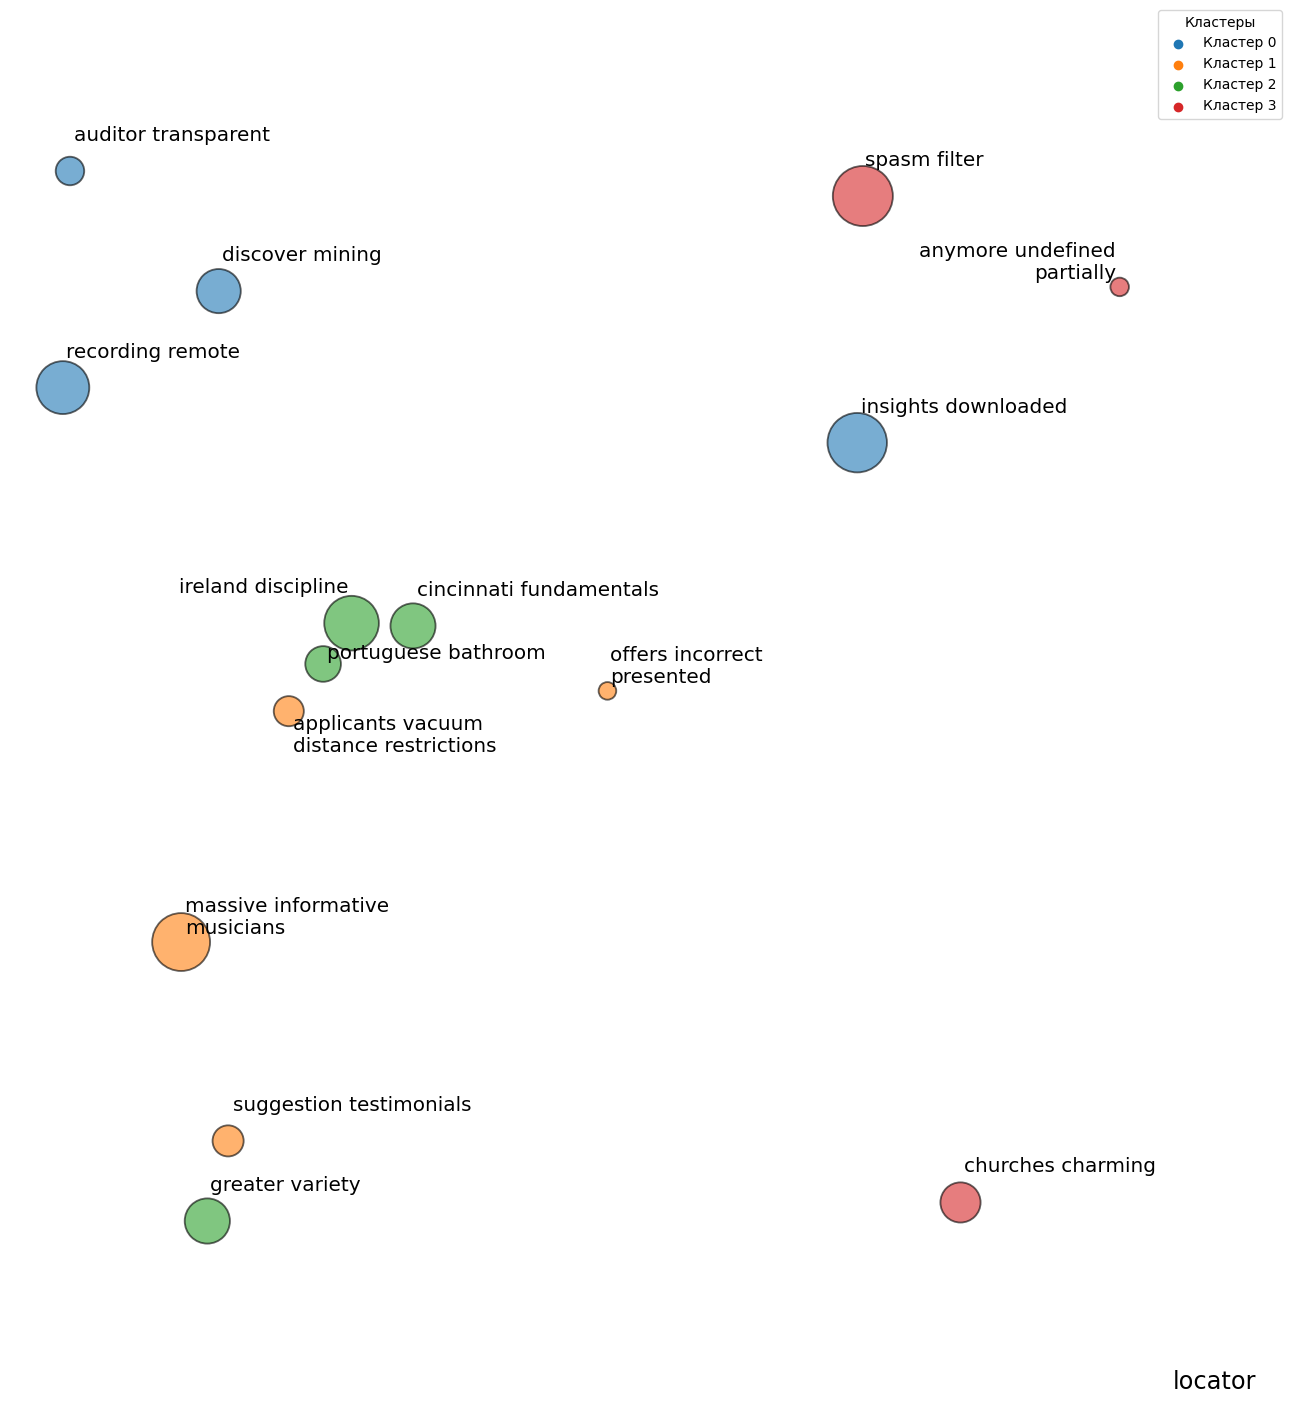

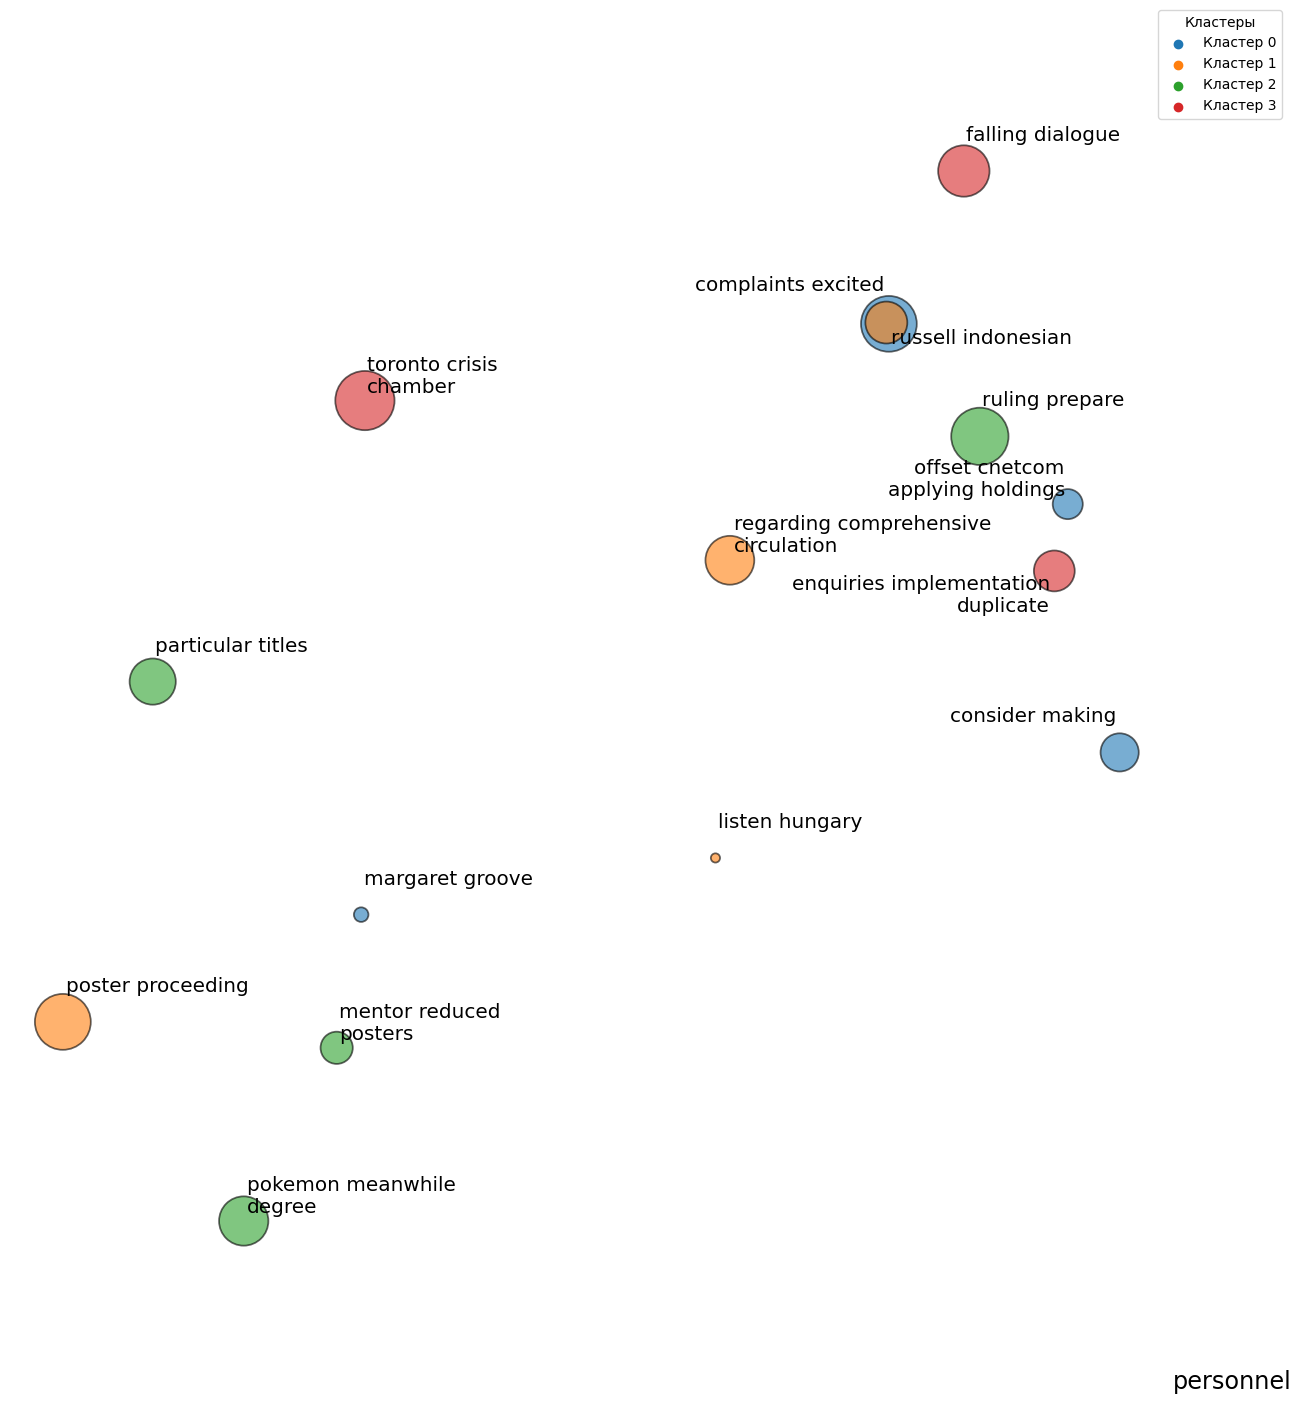

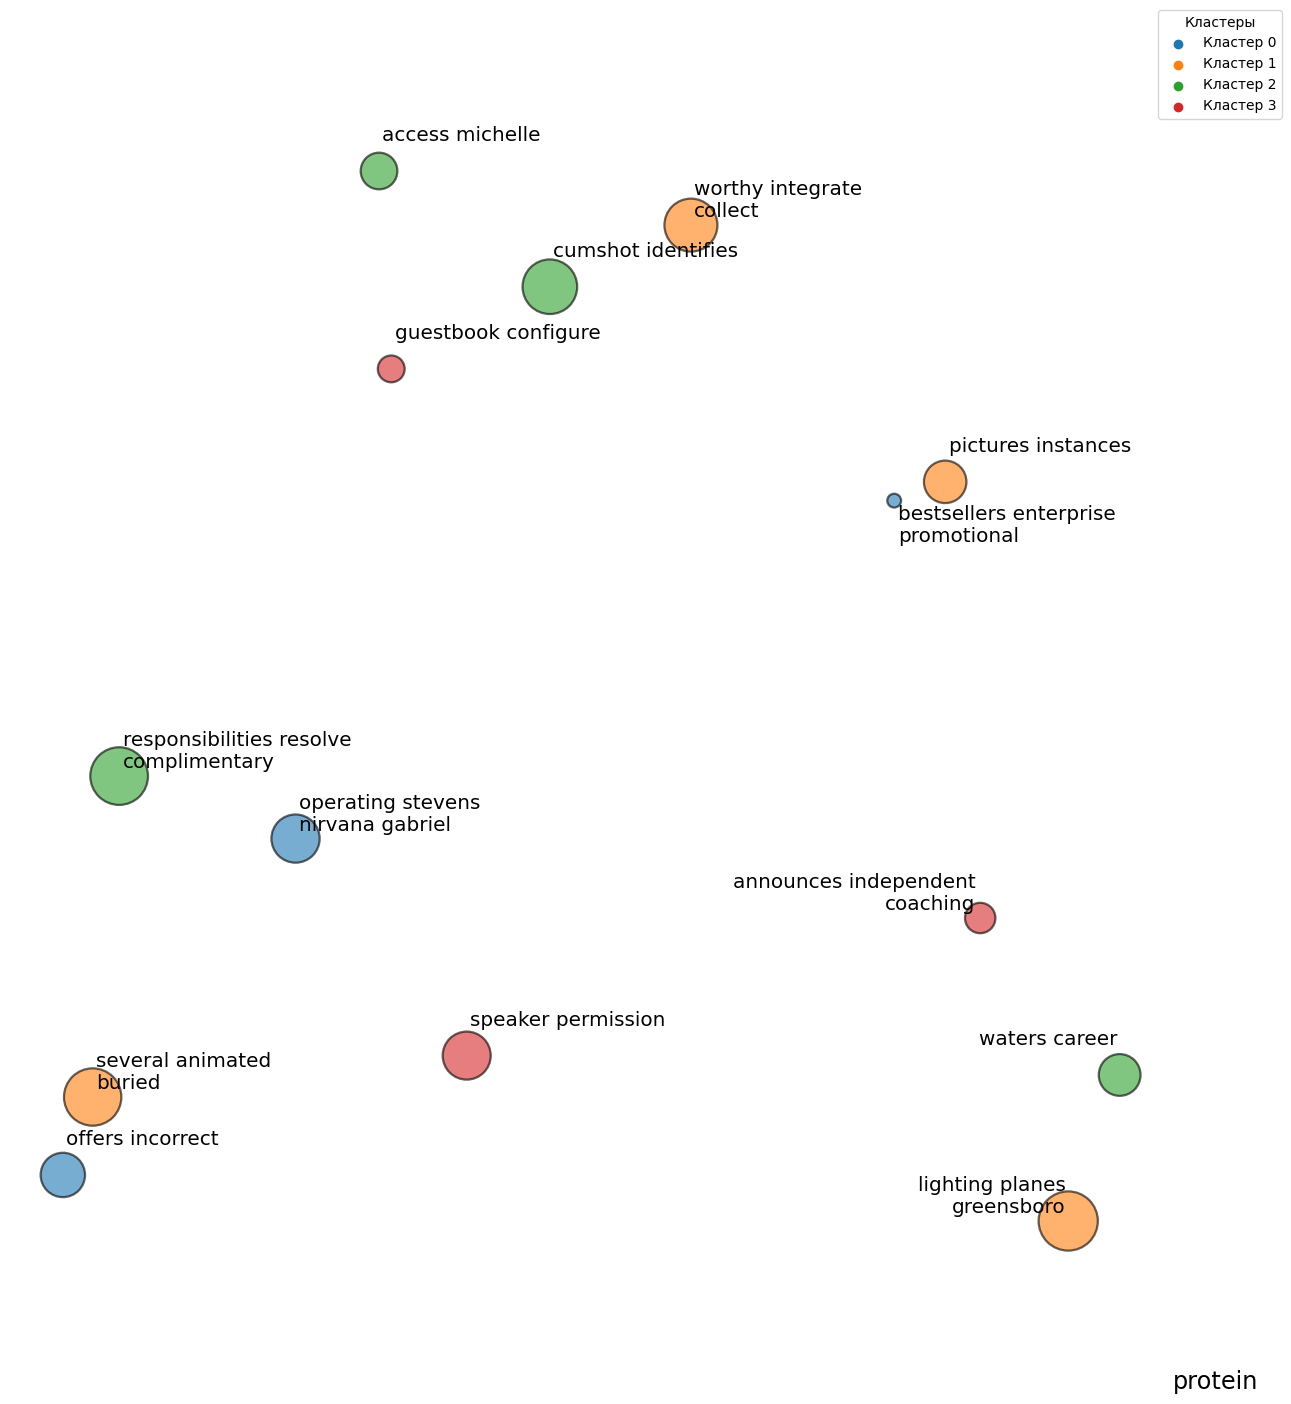

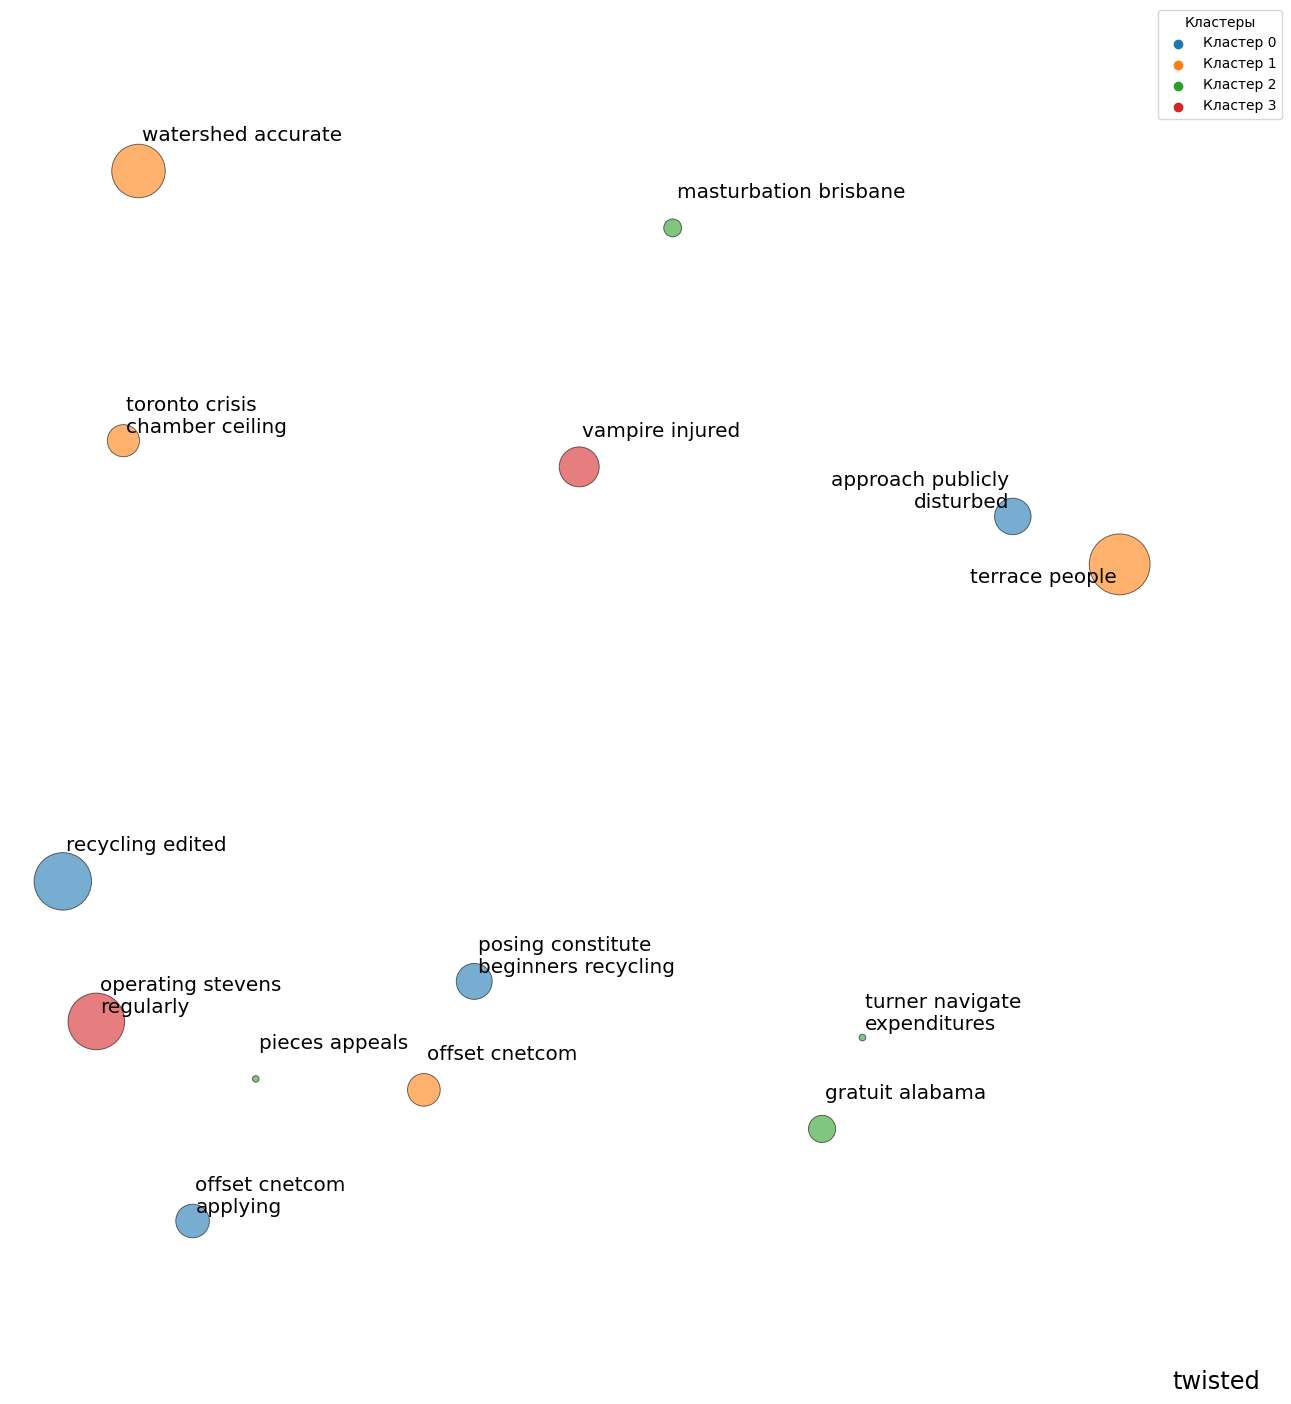

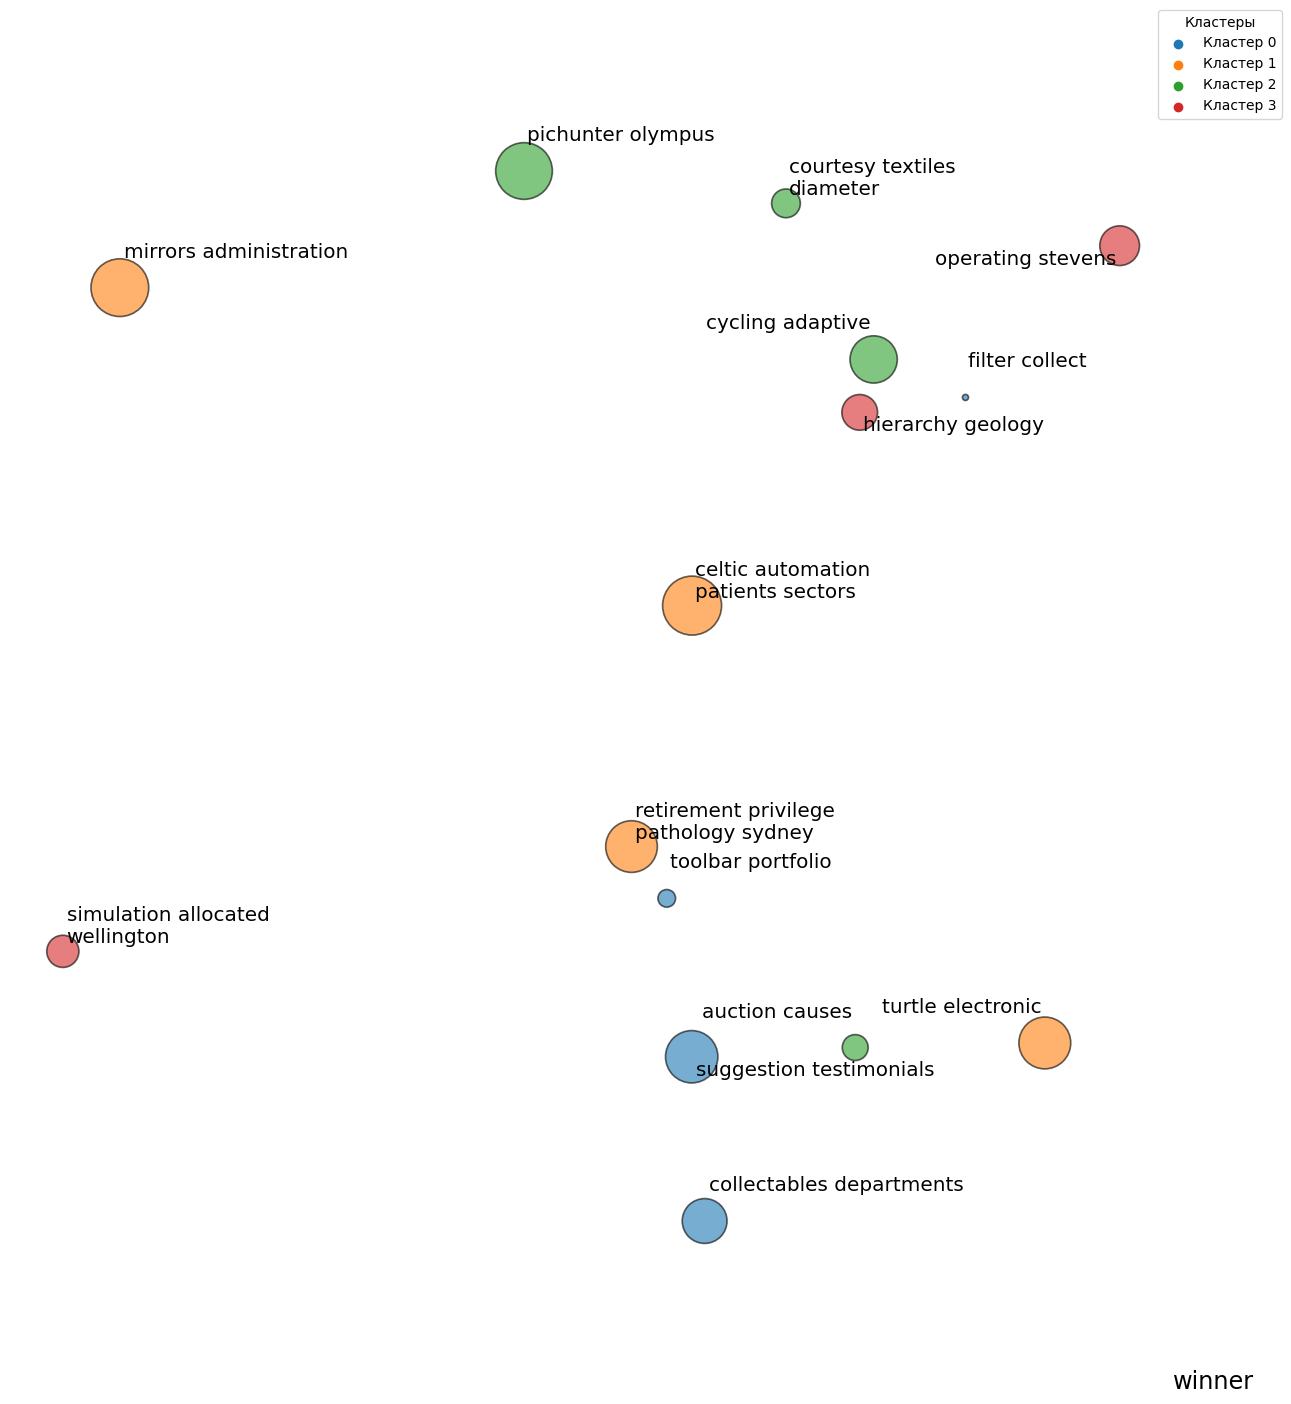

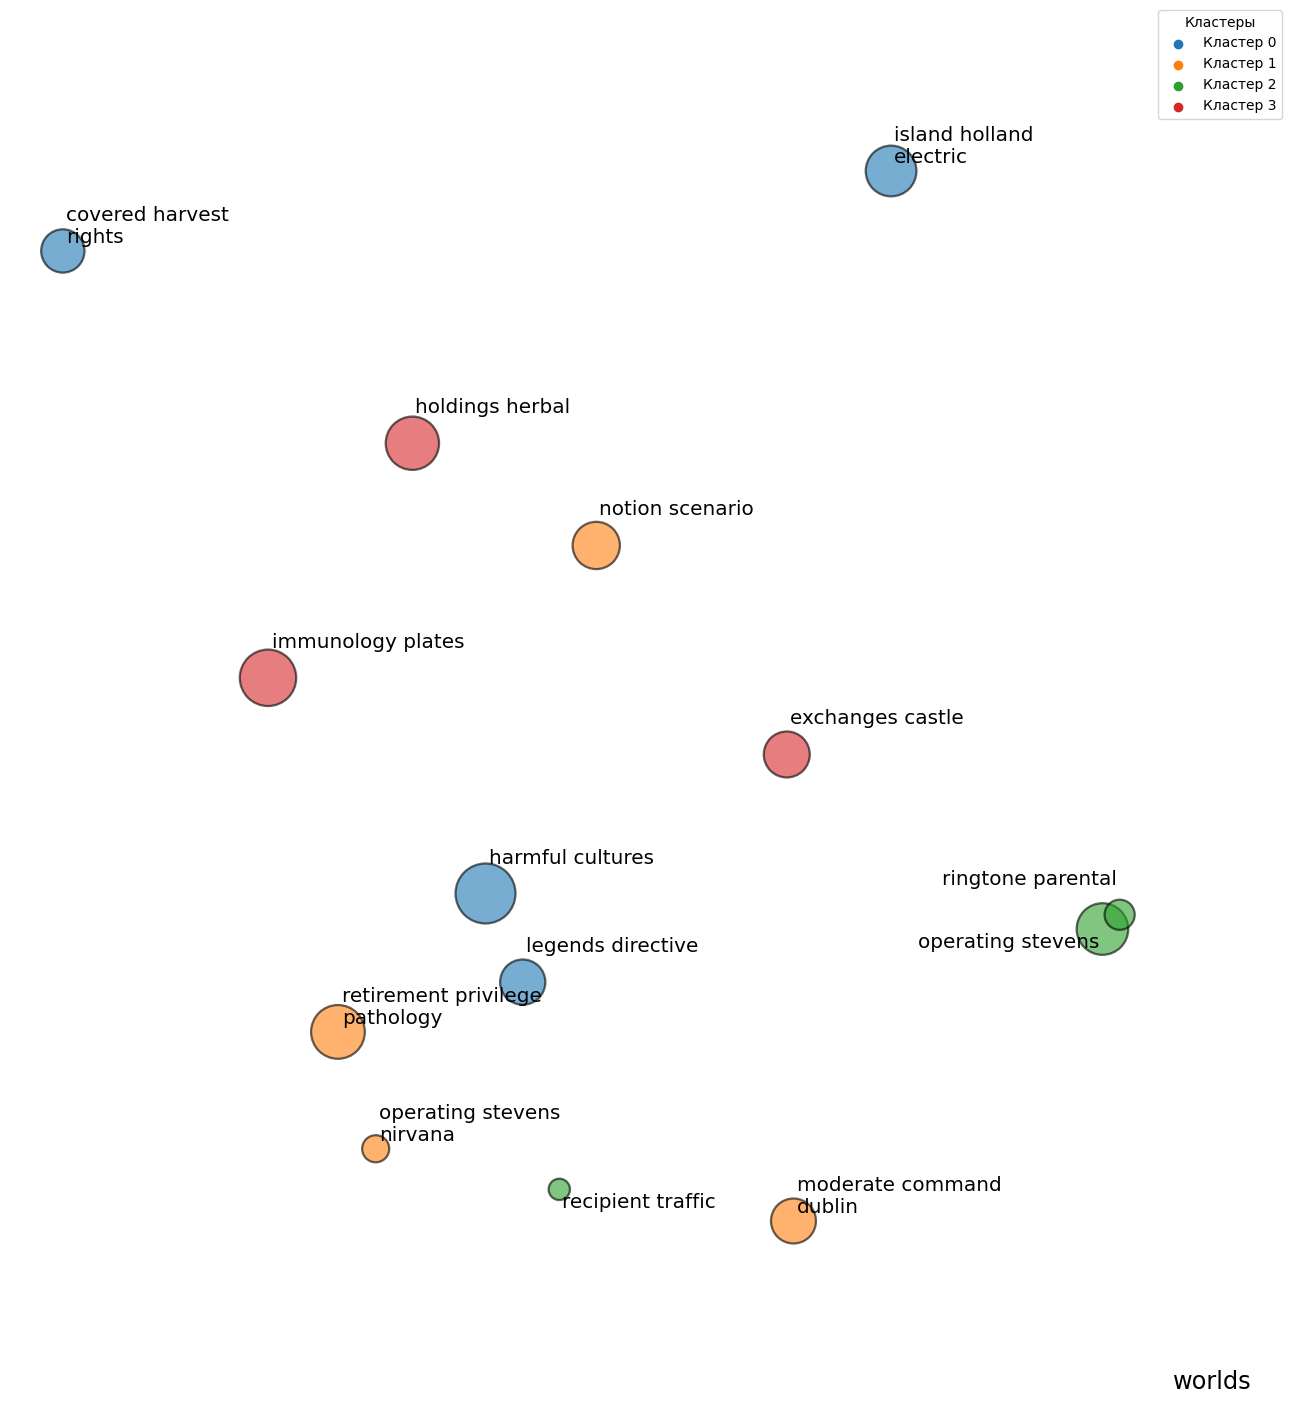

In [360]:
for column in df.area.unique():
    fig, ax = plt.subplots(figsize=(15,15))

    x = df[df.area == column].x
    y = df[df.area == column].y
    cluster = df[df.area == column].cluster_name
    color = df[df.area == column].color
    cnt = df[df.area == column]['count']
    kword = df[df.area == column].keyword.map(wrapper).values

    sns.scatterplot(x=x, y=y, hue=cluster, c=color, s=cnt, legend=True, alpha=0.6, edgecolor='black', ax=ax)
    ax.legend(title='Кластеры', bbox_to_anchor=(1.1,1.1))
    ax.annotate(column, xy=(1,-0.1), xycoords='axes fraction', fontsize='xx-large')
    i = 0
    texts = []
    for (xi, yi) in zip(x, y):
        texts.append(ax.text(xi, yi, kword[i], va='center', ha='center', fontsize='x-large'))
        i += 1
    adjust_text(texts)
    ax.axis('off')
    try:
        fig.savefig('visualizations'column)
    except:
        fig.savefig('ar_vr')